# ¿Qué es una API? 

API es el acrónimo de *Application Programming Interface* es una interfaz que permite a dos servicios conectarse e intercambiar información. Se realiza una petición (o request) y se devuelve una respuesta en formato JSON. 

En términos sencillos, es un intermediario de software que permite que dos aplicaciones se comuniquen entre sí. Pensemos en una API como un traductor entre dos personas que no hablan el mismo idioma pero que pueden comunicarse utilizando un intermediario. 

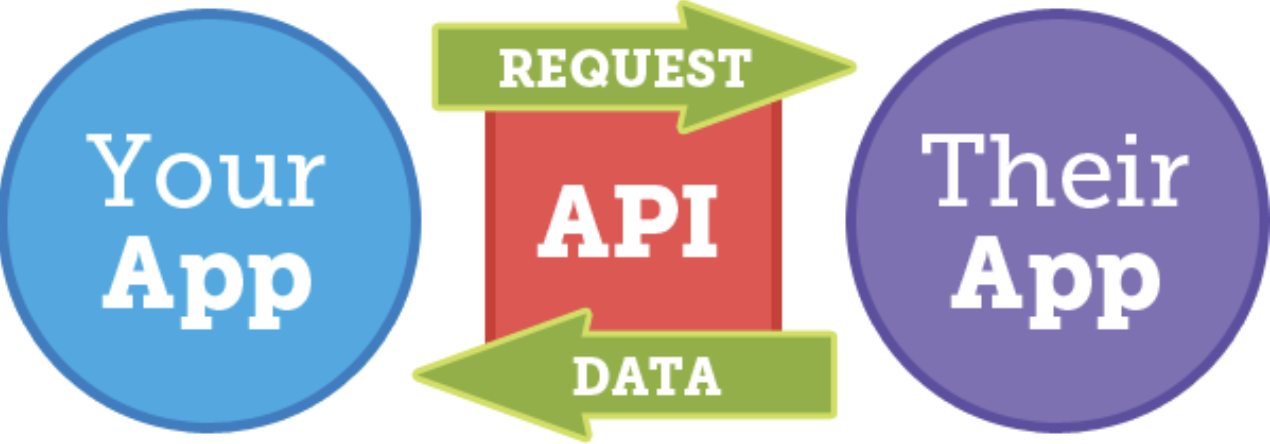


Recordamos que la diferencia entre un JSON y el diccionario al que estamos acostumbrados es que el JSON solo almacena información en formato *string*.

En este punto del Bootcamp es cuando **leer documentación se vuelve esencial**, y es que cada API  "funcionará" de una forma diferente y para poder usarla necesitaremos saber lo que le necesita. 


[Aquí](https://github.com/public-apis/public-apis) tenéis un repo donde podréis encontrar unas cuantas APIs gratuitas por si os apetece trastear un poco. 

# ¿Cómo funciona una API?  
Las APIs se comunican a través de un conjunto de reglas que definen cómo los ordenadores, aplicaciones o máquinas pueden hablar entre sí. La API actúa como intermediario entre dos máquinas que quieren conectarse entre sí para una tarea determinada.


Un ejemplo simplificado sería que, al iniciar sesión en Facebook desde el teléfono, le estás diciendo a la aplicación de Facebook que quieres acceder a tu cuenta. La aplicación móvil hace una llamada a una API para recuperar tu cuenta de Facebook y tus credenciales. Facebook accedería entonces a esta información desde uno de sus servidores y devolvería los datos a la aplicación móvil.

Cuando hacemos una llamada nos devolverá un código con el estado de nuestra petición. Es decir, si ha sido válida o ha habido algún problema. Tenemos muchos tipos de respuestas os dejo [aquí](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)  un link a todos los tipos de errores. Pero sin duda el mejor código que nos puede salir es una **200** que significa que nuestra petición se ejecutó sin ningún problema. 

> Si tenéis más curiosidad de como son los entesijos de una API y como se comunican las distintas aplicaciones tenéis [este](https://www.youtube.com/watch?v=JD6VNRdGl98) que lo explica suuper bien!


# Tipos de peticiones

Para hacer peticiones a la API utilizaremos una librería de HTTP de Python llamada `requests`, que permite realizar peticiones a una URL. Los tipos de peticiones pueden ser varios:

- `GET`: peticiones para solicitar información a la API


- `POST`: peticiones para nutrir datos a la API


# Llamadas en Python 
Como hemos dicho anteriormente para poder trabajar con APIs en tendremos que trabajar con la librería `request` la cual importarmos 👇🏽

In [3]:
# si no la tenemos instalada lo hacemos usando pip o pip3

#pip install requests

In [1]:
import pandas as pd
import requests

# 1 - Extraccion de Datos (Primera llamada )

In [2]:
url = f"https://apidatos.ree.es/es/datos/demanda/evolucion?start_date=2020-01-01T00:00&end_date=2020-12-31T23:59&time_trunc=day"


# Utilizando el método request pasamosla url y guardamos la respuesta en una variable 

res = requests.get(url)
res.status_code

200

Si no sabes lo que es un response pasate por [aqui](https://http.cat/)

In [5]:
res_api = res.json()
res_api

{'data': {'type': 'Evolución de la demanda',
  'id': 'dem1',
  'attributes': {'title': 'Evolución de la demanda',
   'last-update': '2021-01-12T10:19:24.000+01:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'HIT',
    'expireAt': '2023-11-29T08:13:24'}}},
 'included': [{'type': 'Demanda',
   'id': '10297',
   'groupId': None,
   'attributes': {'title': 'Demanda',
    'description': None,
    'color': '#ffea00',
    'type': None,
    'magnitude': None,
    'composite': False,
    'last-update': '2021-01-12T10:19:24.000+01:00',
    'values': [{'value': 574776.72,
      'percentage': 1,
      'datetime': '2020-01-01T00:00:00.000+01:00'},
     {'value': 723522.375,
      'percentage': 1,
      'datetime': '2020-01-02T00:00:00.000+01:00'},
     {'value': 754645.342,
      'percentage': 1,
      'datetime': '2020-01-03T00:00:00.000+01:00'},
     {'value': 702390.878,
      'percentage': 1,
      'datetime': '2020-01-04T00:00:00.000+01:00'},
     {'value': 651967.486,
   

In [6]:
# typo de objeto 

type(res_api)

dict

In [7]:
# Para ver lo que nos devuelve el response lo mas efectivo es analizar las claves del diccionario 

res_api.keys()

dict_keys(['data', 'included'])

In [8]:
def get_api(url):
    """ funcion para hacer request sobre una url

    Args:
        url (str): url objetivo para hacer request

    Returns:
        int/str: devuleve status code / error 
    """
    res = requests.get(url)
    if res.status_code == 200:
        return res.json()
    else:
        return f"Error {res.status_code}"



In [10]:
url = f"https://apidatos.ree.es/es/datos/demanda/evolucion?start_date=2020-01-01T00:00&end_date=2020-12-31T23:59&time_trunc=day"
get_api(url)

{'data': {'type': 'Evolución de la demanda',
  'id': 'dem1',
  'attributes': {'title': 'Evolución de la demanda',
   'last-update': '2021-01-12T10:19:24.000+01:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'HIT',
    'expireAt': '2023-11-29T08:13:24'}}},
 'included': [{'type': 'Demanda',
   'id': '10297',
   'groupId': None,
   'attributes': {'title': 'Demanda',
    'description': None,
    'color': '#ffea00',
    'type': None,
    'magnitude': None,
    'composite': False,
    'last-update': '2021-01-12T10:19:24.000+01:00',
    'values': [{'value': 574776.72,
      'percentage': 1,
      'datetime': '2020-01-01T00:00:00.000+01:00'},
     {'value': 723522.375,
      'percentage': 1,
      'datetime': '2020-01-02T00:00:00.000+01:00'},
     {'value': 754645.342,
      'percentage': 1,
      'datetime': '2020-01-03T00:00:00.000+01:00'},
     {'value': 702390.878,
      'percentage': 1,
      'datetime': '2020-01-04T00:00:00.000+01:00'},
     {'value': 651967.486,
   

# 2 - Transformacion

## 2.1 - Analisis del response

Un json no deja de ser un diccionario. Para ver lo que nos devuelve el response lo mas efectivo es analizar las claves del diccionario

In [13]:
res_api['data']

{'type': 'Evolución de la demanda',
 'id': 'dem1',
 'attributes': {'title': 'Evolución de la demanda',
  'last-update': '2021-01-12T10:19:24.000+01:00',
  'description': None},
 'meta': {'cache-control': {'cache': 'HIT',
   'expireAt': '2023-11-29T08:13:24'}}}

In [15]:
res_api['included']

[{'type': 'Demanda',
  'id': '10297',
  'groupId': None,
  'attributes': {'title': 'Demanda',
   'description': None,
   'color': '#ffea00',
   'type': None,
   'magnitude': None,
   'composite': False,
   'last-update': '2021-01-12T10:19:24.000+01:00',
   'values': [{'value': 574776.72,
     'percentage': 1,
     'datetime': '2020-01-01T00:00:00.000+01:00'},
    {'value': 723522.375,
     'percentage': 1,
     'datetime': '2020-01-02T00:00:00.000+01:00'},
    {'value': 754645.342,
     'percentage': 1,
     'datetime': '2020-01-03T00:00:00.000+01:00'},
    {'value': 702390.878,
     'percentage': 1,
     'datetime': '2020-01-04T00:00:00.000+01:00'},
    {'value': 651967.486,
     'percentage': 1,
     'datetime': '2020-01-05T00:00:00.000+01:00'},
    {'value': 630259.532,
     'percentage': 1,
     'datetime': '2020-01-06T00:00:00.000+01:00'},
    {'value': 789031.621,
     'percentage': 1,
     'datetime': '2020-01-07T00:00:00.000+01:00'},
    {'value': 820143.678,
     'percentage':

In [18]:
res_api['included'][0]

{'type': 'Demanda',
 'id': '10297',
 'groupId': None,
 'attributes': {'title': 'Demanda',
  'description': None,
  'color': '#ffea00',
  'type': None,
  'magnitude': None,
  'composite': False,
  'last-update': '2021-01-12T10:19:24.000+01:00',
  'values': [{'value': 574776.72,
    'percentage': 1,
    'datetime': '2020-01-01T00:00:00.000+01:00'},
   {'value': 723522.375,
    'percentage': 1,
    'datetime': '2020-01-02T00:00:00.000+01:00'},
   {'value': 754645.342,
    'percentage': 1,
    'datetime': '2020-01-03T00:00:00.000+01:00'},
   {'value': 702390.878,
    'percentage': 1,
    'datetime': '2020-01-04T00:00:00.000+01:00'},
   {'value': 651967.486,
    'percentage': 1,
    'datetime': '2020-01-05T00:00:00.000+01:00'},
   {'value': 630259.532,
    'percentage': 1,
    'datetime': '2020-01-06T00:00:00.000+01:00'},
   {'value': 789031.621,
    'percentage': 1,
    'datetime': '2020-01-07T00:00:00.000+01:00'},
   {'value': 820143.678,
    'percentage': 1,
    'datetime': '2020-01-08T0

In [19]:
type(res_api['included'][0])


dict

In [20]:
res_api['included'][0].keys()

dict_keys(['type', 'id', 'groupId', 'attributes'])

In [23]:
res_api['included'][0]["attributes"]

{'title': 'Demanda',
 'description': None,
 'color': '#ffea00',
 'type': None,
 'magnitude': None,
 'composite': False,
 'last-update': '2021-01-12T10:19:24.000+01:00',
 'values': [{'value': 574776.72,
   'percentage': 1,
   'datetime': '2020-01-01T00:00:00.000+01:00'},
  {'value': 723522.375,
   'percentage': 1,
   'datetime': '2020-01-02T00:00:00.000+01:00'},
  {'value': 754645.342,
   'percentage': 1,
   'datetime': '2020-01-03T00:00:00.000+01:00'},
  {'value': 702390.878,
   'percentage': 1,
   'datetime': '2020-01-04T00:00:00.000+01:00'},
  {'value': 651967.486,
   'percentage': 1,
   'datetime': '2020-01-05T00:00:00.000+01:00'},
  {'value': 630259.532,
   'percentage': 1,
   'datetime': '2020-01-06T00:00:00.000+01:00'},
  {'value': 789031.621,
   'percentage': 1,
   'datetime': '2020-01-07T00:00:00.000+01:00'},
  {'value': 820143.678,
   'percentage': 1,
   'datetime': '2020-01-08T00:00:00.000+01:00'},
  {'value': 820769.614,
   'percentage': 1,
   'datetime': '2020-01-09T00:00:0

In [24]:
res_api['included'][0]["attributes"].keys()

dict_keys(['title', 'description', 'color', 'type', 'magnitude', 'composite', 'last-update', 'values'])

In [26]:
type(res_api['included'][0]["attributes"]["values"])

list

In [27]:
len(res_api['included'][0]["attributes"]["values"])

366

In [28]:
valores_response = res_api['included'][0]["attributes"]["values"]
valores_response

[{'value': 574776.72,
  'percentage': 1,
  'datetime': '2020-01-01T00:00:00.000+01:00'},
 {'value': 723522.375,
  'percentage': 1,
  'datetime': '2020-01-02T00:00:00.000+01:00'},
 {'value': 754645.342,
  'percentage': 1,
  'datetime': '2020-01-03T00:00:00.000+01:00'},
 {'value': 702390.878,
  'percentage': 1,
  'datetime': '2020-01-04T00:00:00.000+01:00'},
 {'value': 651967.486,
  'percentage': 1,
  'datetime': '2020-01-05T00:00:00.000+01:00'},
 {'value': 630259.532,
  'percentage': 1,
  'datetime': '2020-01-06T00:00:00.000+01:00'},
 {'value': 789031.621,
  'percentage': 1,
  'datetime': '2020-01-07T00:00:00.000+01:00'},
 {'value': 820143.678,
  'percentage': 1,
  'datetime': '2020-01-08T00:00:00.000+01:00'},
 {'value': 820769.614,
  'percentage': 1,
  'datetime': '2020-01-09T00:00:00.000+01:00'},
 {'value': 814759.827,
  'percentage': 1,
  'datetime': '2020-01-10T00:00:00.000+01:00'},
 {'value': 732531.725,
  'percentage': 1,
  'datetime': '2020-01-11T00:00:00.000+01:00'},
 {'value': 

## 2.2 - Transformacion de los datos de un diccionario 

In [30]:
type(valores_response)

list

In [34]:
valores_response[:3]

[{'value': 574776.72,
  'percentage': 1,
  'datetime': '2020-01-01T00:00:00.000+01:00'},
 {'value': 723522.375,
  'percentage': 1,
  'datetime': '2020-01-02T00:00:00.000+01:00'},
 {'value': 754645.342,
  'percentage': 1,
  'datetime': '2020-01-03T00:00:00.000+01:00'}]

In [36]:
diccionario_limpio_prueba =  valores_response[0].copy()
diccionario_limpio_prueba["demanada"] = diccionario_limpio_prueba.pop("value")
diccionario_limpio_prueba

{'percentage': 1,
 'datetime': '2020-01-01T00:00:00.000+01:00',
 'demanada': 574776.72}

In [37]:
diccionario_limpio_prueba.pop("percentage")
diccionario_limpio_prueba

{'datetime': '2020-01-01T00:00:00.000+01:00', 'demanada': 574776.72}

In [38]:
recordatorio_diccionario = {"clave1": 100, "clave2":200}
recordatorio_diccionario

{'clave1': 100, 'clave2': 200}

In [39]:
recordatorio_diccionario["clave3"] = 300
recordatorio_diccionario

{'clave1': 100, 'clave2': 200, 'clave3': 300}

In [42]:
fecha_completa =  diccionario_limpio_prueba["datetime"]
type(fecha_completa)

str

In [47]:
ano = fecha_completa[:4]
print(f"año {ano}")

año 2020


In [50]:
mes = fecha_completa[5:7]
print(f"mes {mes}")

mes 01


In [51]:
dia = fecha_completa[8:10]
print(f"dia {dia}")

dia 01


In [54]:
diccionario_limpio_prueba["ano"] = ano
diccionario_limpio_prueba["mes"] = mes
diccionario_limpio_prueba["dia"] = dia
diccionario_limpio_prueba

{'datetime': '2020-01-01T00:00:00.000+01:00',
 'demanada': 574776.72,
 'ano': '2020',
 'mes': '01',
 'dia': '01'}

In [55]:
from datetime import datetime


In [59]:
fecha_completa = diccionario_limpio_prueba["datetime"][:10]
print(f"fecha completa es {fecha_completa}")

fecha completa es 2020-01-01


In [61]:
fecha_completa = datetime.strptime(fecha_completa,"%Y-%m-%d")
fecha_completa

datetime.datetime(2020, 1, 1, 0, 0)

In [62]:
ano = fecha_completa.strftime("%Y")
print(f"Año es {ano}")

Año es 2020


In [63]:
mes = fecha_completa.strftime("%m")
print(f"Mes es {mes}")
dia = fecha_completa.strftime("%d")
print(f"Dia es {dia}")

Mes es 01
Dia es 01


In [66]:
# Resumen // Funcion

def limpiar_diccionario(diccionario):
    """ fucnion para hacer limpieza de diccionario y devolver info estructurada 

    Args:
        diccionario (json): diccionario con key , values 

    Returns:
        dicc: limpio 
    """
    fecha_completa = diccionario_limpio_prueba["datetime"][:10]
    fecha_datetime = datetime.strptime(fecha_completa,"%Y-%m-%d")
    ano = fecha_datetime.strftime("%Y")
    mes = fecha_datetime.strftime("%m")
    dia = fecha_datetime.strftime("%d")
    dia_semana = fecha_datetime.strftime('%A')


    # creamos el diccionario para devolver la inforamcion estructurada a nuestro gusto
    diccionario["fecha"] = fecha_completa

    diccionario["ano"] = ano
    diccionario["mes"] = mes
    diccionario["dia"] = dia
    diccionario["dia_semana"] = dia_semana

    diccionario["demanda"] = diccionario.pop("value") # cambiamos el nombre de la clave value por demanda
    diccionario.pop("percentage") # eliminamos la clave percentage del diccionario 
    diccionario.pop("datetime")     #eliminamos la clave datetime del diccionario 

    return diccionario



In [67]:
dicc = valores_response[0].copy()
limpiar_diccionario(dicc)

{'fecha': '2020-01-01',
 'ano': '2020',
 'mes': '01',
 'dia': '01',
 'dia_semana': 'Wednesday',
 'demanda': 574776.72}

Ahora que lo tenemos para un solo elemento lo escalamos para todos elementos de nuestro diccionario

# RESUMEN

El siguiente script realiza una llamada a una API, obtiene los datos de respuesta en formato JSON y realiza algunas modificaciones en los diccionarios obtenidos. La función get_api(url) es utilizada para obtener los datos de la API, y la función limpiar_diccionario(diccionario) se utiliza para modificar los diccionarios resultantes.






# Script final 


# 3 - Carga de datos en BBDD

# 4 - Extraccion de datos de Mongo 

# 5 - Transformacion de datos  

La limpieza de los datos tambien es una transformacion de los datos. 

# 4 - Analisis 

Hora de analizar la serie temporal 

# serie temporal de la demanda nacional